# Constructor Performance Per Circuit

<font size = 5> By Chris Kim (2517871)

## Introduction

<font size = "3">

Formula 1 is the most popular autombile racing sport in the world. Governed by the Fédération Internationale de l'Automobile (FIA), F1 features a series of highly specialized, open-wheel, single-seater cars that compete in a series of races known as Grands Prix. The championship attracts top teams and drivers from around the world, including renowned manufacturers like Mercedes, Ferrari, and Red Bull. F1 events take place on a diverse range of circuits, including traditional racetracks and street circuits, and the season culminates in the crowning of a World Champion based on a points system awarded for race performance throughout the season. The sport is characterized by its high-speed racing, cutting-edge technology, strategic team decisions, and the pursuit of excellence in engineering and aerodynamics. The objective of this project is to identify the relationship between constructors teams and success at each circuit.  

This project involves 4 different datasets, `constructors`, `constructor_standings`, `circuits`, and `races`. With a combination of data cleaning, merging, and aggregating, we obtained multiple data tables comparing performance of constructor teams at different circuits. These were then plotted. The plots showed that Mercedes and Redbull dominate at almost every circuit, but when including consistency, Mercedes tops the charts, signficantly ahead of Redbull and Ferrari. We also notice that certain circuits are more competitive and have higher level performances, suggesting that these races may be more entertaining. 


### Data Importation



<font size = 3> The following are the imported libraries. `pandas` is used for data manipulation and cleaning, `numpy` is used for computations, and `matplotlib.pyplot` is used for creating visualizations. Additionally, I used the `seaborn` library, which allowed me to efficiently graph categorical data.

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


The dataset tables that are used in the following analyses are constructors, constructor_standings, circuits, and races. 
`constructors` contains 5 columns: constructorId, constructorRef, name, nationalisty, and url. The dataset has 211 
rows, thus 1055 total observations. `constructor_standings` contains 5 columns: constructorStandingsId, raceId, 
constructorId, points, position, positionText, and wins. This dataset has 12941 rows, thus 90,587 observations. 
`circuits` contains 9 columns: circuitId, circuitRef, name, location, country, lat, lng, alt, url. This dataset has 
77 rows, thus 693 observations. `races` contains 18 columns, and 1102 rows, thus 19,836 total observations. We notice that
the raw data contains way a tremendous amount of data; there is a necessity to identify relevant data and remove the 
irrelevant ones. First, we will observe the purpose of each dataset. The `constructors` and `constructor_standings` 
dataframes will be used to analyze performances of the different constructors. `races` dataset will  be used to connect 
the two cleaned constructor datasets to `circuits`. `circuits` has the information regarding the names of the famous 
Grand Prix locations.

In [225]:

dataList = ["constructors", "constructor_standings", "circuits", "races"]

dataPath = "Formula1-DatasetFull/raw_data/"

for dataName in dataList:
    globals()[dataName] = pd.read_csv(dataPath + dataName + ".csv")
    #print(dataName)

#constructor = pd.read_csv("Formula1-DatasetFull/raw_data/constructors.csv")
#constructor_standings = pd.read_csv("Formula1-DatasetFull/raw_data/constructor_standings.csv")
#results = pd.read_csv("Formula1-DatasetFull/raw_data/results.csv")
#circuits = pd.read_csv("Formula1-DatasetFull/raw_data/circuits.csv")
#races = pd.read_csv("Formula1-DatasetFull/raw_data/races.csv")

display(constructor_standings)




,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
12936,28408,1098,210,0.0,6,6,0
12937,28409,1098,1,0.0,7,7,0
12938,28410,1098,131,0.0,8,8,0
12939,28411,1098,9,0.0,9,9,0


## Data Manipulation

### Data Merging

<font size= 3> The following section contains the merging process for unifying the four datasets into one dataset that contains all the relevant data. First, the two constructor datasets were merged on the column "constructorId". `circuit` and `races` datasets were merged with the relevant columns through the column "circuitId". Because `circuits` and `constructors` datasets both contained a column called "name" representing different things, the respective "name" columns on each dataset were renamed to better specify their purpose on the merged datasets. The merged datasets were merged again on the column "raceId" to create our final, relevant dataset with 13027 rows × 16 columns. Then the ``NaN`` values were dropped from the dataset. With the ``NaN`` values dropped, we saw a decrease in the number of rows to 12941.

In [168]:
# Merging constructor data
constMerged = pd.merge(constructors[["constructorId","constructorRef","name","nationality"]], constructor_standings, on="constructorId", how="left")
constMerged.rename(columns = {"name":"constructorName"}, inplace=True)

#display(constMerged)

#let's continue merging!

#merging races and circuit; this is to be merged with constructor merged.
cirRaceMerged = pd.merge(races[["raceId","circuitId","date"]], circuits[["circuitId","circuitRef","name","location","country"]], on = "circuitId", how = "left")
cirRaceMerged.rename(columns = {"name":"circuitName"}, inplace=True)
#display(cirRaceMerged)

# final dataframe with all the data necessary combined:
finMerged = pd.merge(cirRaceMerged,constMerged,on="raceId", how="left")
display(finMerged)

testFinMerged = finMerged

testFinMerged.dropna(subset = ["constructorId"],inplace=True) # created a new df just in case. 
display(testFinMerged) 

,raceId,circuitId,date,circuitRef,circuitName,location,country,constructorId,constructorRef,constructorName,nationality,constructorStandingsId,points,position,positionText,wins
0,1,1,2009-03-29,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,2.0,bmw_sauber,BMW Sauber,German,4044.0,0.0,7.0,7,0.0
1,1,1,2009-03-29,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,3.0,williams,Williams,British,4041.0,3.0,4.0,4,0.0
2,1,1,2009-03-29,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,4.0,renault,Renault,French,4040.0,4.0,3.0,3,0.0
3,1,1,2009-03-29,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,5.0,toro_rosso,Toro Rosso,Italian,4042.0,3.0,5.0,5,0.0
4,1,1,2009-03-29,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,6.0,ferrari,Ferrari,Italian,4046.0,0.0,9.0,9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13022,1116,69,2023-10-22,americas,Circuit of the Americas,Austin,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13023,1117,32,2023-10-29,rodriguez,Autódromo Hermanos Rodríguez,Mexico City,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13024,1118,18,2023-11-05,interlagos,Autódromo José Carlos Pace,São Paulo,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13025,1119,80,2023-11-19,vegas,Las Vegas Strip Street Circuit,Las Vegas,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,raceId,circuitId,date,circuitRef,circuitName,location,country,constructorId,constructorRef,constructorName,nationality,constructorStandingsId,points,position,positionText,wins
0,1,1,2009-03-29,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,2.0,bmw_sauber,BMW Sauber,German,4044.0,0.0,7.0,7,0.0
1,1,1,2009-03-29,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,3.0,williams,Williams,British,4041.0,3.0,4.0,4,0.0
2,1,1,2009-03-29,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,4.0,renault,Renault,French,4040.0,4.0,3.0,3,0.0
3,1,1,2009-03-29,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,5.0,toro_rosso,Toro Rosso,Italian,4042.0,3.0,5.0,5,0.0
4,1,1,2009-03-29,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,6.0,ferrari,Ferrari,Italian,4046.0,0.0,9.0,9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13000,1098,3,2023-03-05,bahrain,Bahrain International Circuit,Sakhir,Bahrain,117.0,aston_martin,Aston Martin,British,28406.0,0.0,4.0,4,0.0
13001,1098,3,2023-03-05,bahrain,Bahrain International Circuit,Sakhir,Bahrain,131.0,mercedes,Mercedes,German,28410.0,0.0,8.0,8,0.0
13002,1098,3,2023-03-05,bahrain,Bahrain International Circuit,Sakhir,Bahrain,210.0,haas,Haas F1 Team,American,28408.0,0.0,6.0,6,0.0
13003,1098,3,2023-03-05,bahrain,Bahrain International Circuit,Sakhir,Bahrain,213.0,alphatauri,AlphaTauri,Italian,28404.0,0.0,2.0,2,0.0


### Aggregating to Find Meaningful Metrics

<font size = 3> This will be a part of the data cleaning process. We want to reduce the 12941 rows x 16 columns worth of data into a handful, so that we can create plots and summary charts of the data. The aggregate `aggOfConstructors` shown in the first data table shows the top performing constructors organized by the mean points collected per race. Mercedes dominates the list with an average of about 276 points per race. However, when observing the total points accumulate, we see that Ferrari has more than 15,000 points and over double the amount of races (bar McLaren) compared to the other brands. After getting a brief understanding of the data, we can create another aggregate dataset that groups by both constructor and circuit. This data is stored in the `constAgg` dataset with a size of 2964 rows x 5 columns. 

In [248]:
# find the relationship between constructor and winnings

#display(constMerged.sort_values(by = "raceId"))

#raceIdOne = testFinMerged.query("raceId == 100")
#display(raceIdOne)

constAgg = (testFinMerged.groupby(["circuitName","constructorName"])
                      .agg(mean_points = ('points','mean'),
                           sum_points = ('points','sum'),
                           min_points =  ('points','min'),
                           max_points =  ('points','max'),
                           count_obs   = ('points',len))).sort_values(by = 'mean_points', ascending = False)

#constMerged_alpine = constMerged.query("constructorRef == 'afm'")
#display(constMerged_alpine)
aggOfConstructors = (testFinMerged.groupby("constructorName")  # test for checking relevant way to filter out data to get rid of bad constructors
                      .agg(mean_points = ('points','mean'),
                           sum_points = ('points','sum'),
                           min_points =  ('points','min'),
                           max_points =  ('points','max'),
                           count_obs   = ('points',len))).sort_values(by = 'mean_points', ascending = False)
aggOfConstructors=aggOfConstructors.loc[aggOfConstructors["sum_points"] != 0]
aggOfConstructors=aggOfConstructors.loc[aggOfConstructors["max_points"] > 90]

display(aggOfConstructors) # get the top couple. Mean points is probably the best indicator. 
display(constAgg) # finalized grouped constructor and circuit. 

#temp = constAgg
#temp.dropna(subset = ["mean_points"],inplace=True)      #this data is now already cleaned through by removing all the NaN values from merged dataset
#display(temp) # test post data cleaning 

# temp now has all the useless values out. Now, how can i translate this removed values to the main dataset?



#display(tempCleaned)

#display(constAgg)


,mean_points,sum_points,min_points,max_points,count_obs
constructorName,,,,,
Mercedes,276.186538,71808.5,0.0,765.0,260
Red Bull,186.742816,64986.5,0.0,759.0,348
Brawn,103.058824,1752.0,18.0,172.0,17
Lotus F1,97.207792,7485.0,0.0,315.0,77
Ferrari,89.046397,90204.0,0.0,571.0,1013
Alpine F1 Team,75.644444,3404.0,0.0,173.0,45
McLaren,64.692873,57188.5,0.0,497.0,884
Racing Point,61.815789,2349.0,2.0,195.0,38
Force India,49.037915,10347.0,0.0,187.0,211


mean_points  \
circuitName                  constructorName                          
Autódromo Hermanos Rodríguez Mercedes                    579.071429   
Losail International Circuit Mercedes                    546.500000   
                             Red Bull                    541.500000   
Yas Marina Circuit           Mercedes                    521.192308   
Circuit of the Americas      Mercedes                    501.150000   
...                                                             ...   
Circuit Park Zandvoort       RE                            0.000000   
Nürburgring                  Lotus-Pratt &amp; Whitney     0.000000   
                             Lyncar                        0.000000   
                             MBM                           0.000000   
AVUS                         Aston Martin                  0.000000   

                                                        sum_points  \
circuitName                  constructorName                         
Autódromo Hermanos Rodríguez Mercedes                       4053.5   
Losail International Circuit Mercedes                        546.5   
                             Red Bull                        541.5   
Yas Marina Circuit           Mercedes                       6775.5   
Circuit of the Americas      Mercedes                       5011.5   
...                                                            ...   
Circuit Park Zandvoort       RE                                0.0   
Nürburgring                  Lotus-Pratt &amp; Whitney         0.0   
                             Lyncar                            0.0   
                             MBM                               0.0   
AVUS                         Aston Martin                      0.0   

                                                        min_points  \
circuitName                  constructorName                         
Autódromo Hermanos Rodríguez Mercedes                        447.0   
Losail International Circuit Mercedes                        546.5   
                             Red Bull                        541.5   
Yas Marina Circuit           Mercedes                        136.0   
Circuit of the Americas      Mercedes                        136.0   
...                                                            ...   
Circuit Park Zandvoort       RE                                0.0   
Nürburgring                  Lotus-Pratt &amp; Whitney         0.0   
                             Lyncar                            0.0   
                             MBM                               0.0   
AVUS                         Aston Martin                      0.0   

                                                        max_points  count_obs  
circuitName                  constructorName                                   
Autódromo Hermanos Rodríguez Mercedes                        679.0          7  
Losail International Circuit Mercedes                        546.5          1  
                             Red Bull                        541.5          1  
Yas Marina Circuit           Mercedes                        765.0         13  
Circuit of the Americas      Mercedes                        695.0         10  
...                                                            ...        ...  
Circuit Park Zandvoort       RE                                0.0          1  
Nürburgring                  Lotus-Pratt &amp; Whitney         0.0          1  
                             Lyncar                            0.0          2  
                             MBM                               0.0          1  
AVUS                         Aston Martin                      0.0          1  

[2964 rows x 5 columns]

<font size = 3> By aggregating, we lowered the number of rows to 2964, but the data still seems to have a lot of irrelevant data. For example, the bottom shows a lot of 0s for all data probably due to small constructor teams not getting the opportunity to race in a plethora of races. The lack of data from the smaller teams do not help us learn any trends, therefore, we are going to install some restrictions to keep the most relevant data. By setting the minimum number of mean points to be at least 120, we can isolate competitive teams and eliminate the non-competitive ones. Through that filter, we have reduced the number of rows to 107.

In [249]:
# with the connected data, do more data cleaning: remove 
removeZeroPoints = constAgg

removeZeroPoints = removeZeroPoints.loc[removeZeroPoints["sum_points"] != 0]
removeZeroPoints=removeZeroPoints.loc[removeZeroPoints["mean_points"] > 120]
display(removeZeroPoints)


mean_points  sum_points  \
circuitName                  constructorName                            
Autódromo Hermanos Rodríguez Mercedes          579.071429      4053.5   
Losail International Circuit Mercedes          546.500000       546.5   
                             Red Bull          541.500000       541.5   
Yas Marina Circuit           Mercedes          521.192308      6775.5   
Circuit of the Americas      Mercedes          501.150000      5011.5   
...                                                   ...         ...   
Marina Bay Street Circuit    Alpine F1 Team    125.000000       125.0   
Circuit Gilles Villeneuve    Red Bull          124.400000      1866.0   
Marina Bay Street Circuit    Lotus F1          123.750000       495.0   
Fuji Speedway                Ferrari           122.500000       490.0   
Istanbul Park                Red Bull          120.222222      1082.0   

                                              min_points  max_points  \
circuitName                  constructorName                           
Autódromo Hermanos Rodríguez Mercedes              447.0       679.0   
Losail International Circuit Mercedes              546.5       546.5   
                             Red Bull              541.5       541.5   
Yas Marina Circuit           Mercedes              136.0       765.0   
Circuit of the Americas      Mercedes              136.0       695.0   
...                                                  ...         ...   
Marina Bay Street Circuit    Alpine F1 Team        125.0       125.0   
Circuit Gilles Villeneuve    Red Bull                4.0       304.0   
Marina Bay Street Circuit    Lotus F1                8.0       231.0   
Fuji Speedway                Ferrari                83.0       170.0   
Istanbul Park                Red Bull               10.0       397.5   

                                              count_obs  
circuitName                  constructorName             
Autódromo Hermanos Rodríguez Mercedes                 7  
Losail International Circuit Mercedes                 1  
                             Red Bull                 1  
Yas Marina Circuit           Mercedes                13  
Circuit of the Americas      Mercedes                10  
...                                                 ...  
Marina Bay Street Circuit    Alpine F1 Team           1  
Circuit Gilles Villeneuve    Red Bull                15  
Marina Bay Street Circuit    Lotus F1                 4  
Fuji Speedway                Ferrari                  4  
Istanbul Park                Red Bull                 9  

[107 rows x 5 columns]

<font size = 3> The data of interest is the performance at each circuit, therefore we are interested in the mean and sum points that each constructor team collected at each circuit.

## Results

### Plotting Data

<font size = 3> Now that our data is small enough to work with, we are going to create plots. Because we are measuring the effect of different circuits, circuit name will be the X axis. The points are the dependent variable, therefore should be plotted on the y-axis. Then the different constructor teams can be distinguished through the color of the dot. The first plot shows mean points vs circuit and second plot shows sum points vs circuit. 

/var/folders/09/p8y0p7q5041d1yjwsfxkcn800000gn/T/ipykernel_51151/2380725612.py:11: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  meanPointPlot = sns.catplot(data=alphOrderConCircData, x="circuitName", y="mean_points",


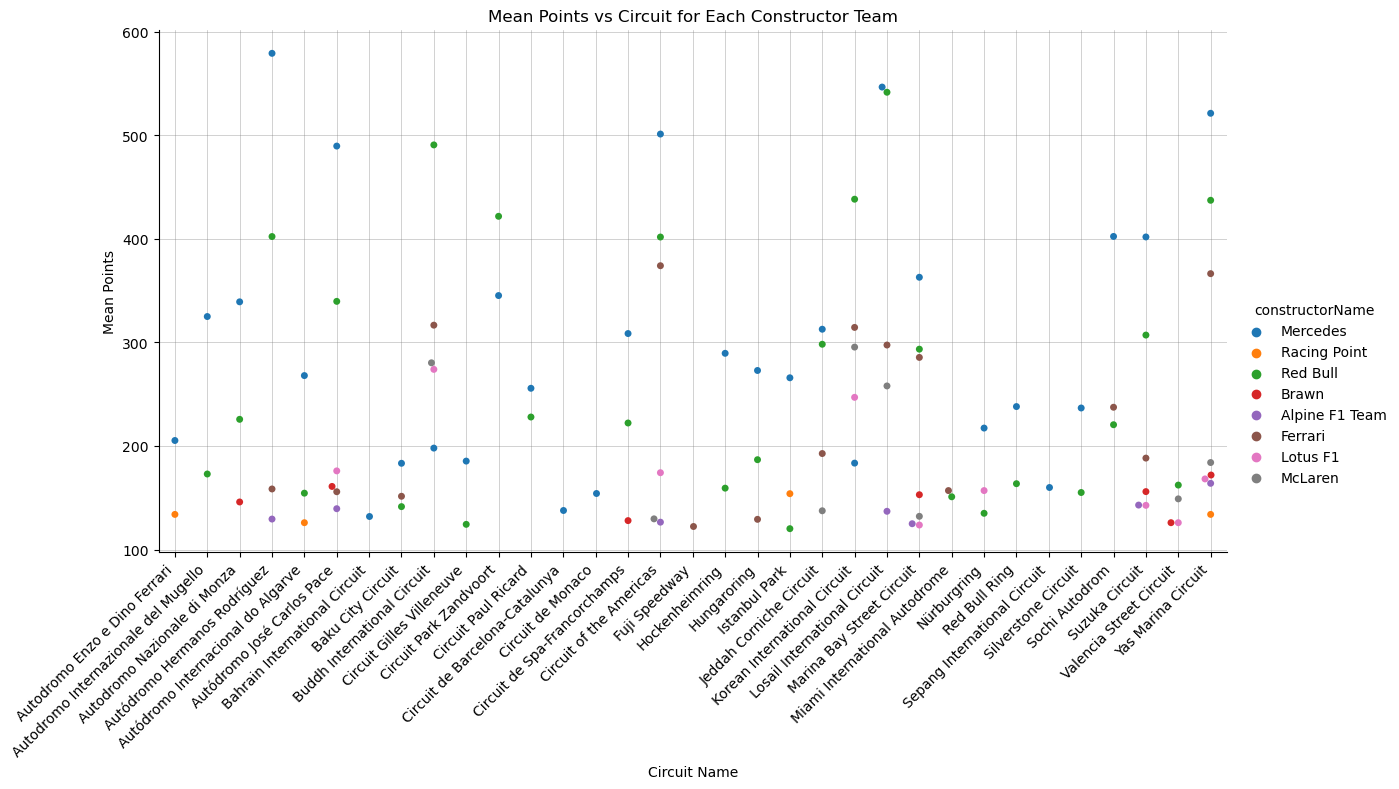

In [247]:
# plot data: x axis should be the circuit, y axis is mean points, color is different . 
# scatterplot probably works the best. 
# plt.hist(x = removeZeroPoints["circuitRef"], y = removeZeroPoints["mean_points"], c = removeZeroPoints["constructorRef"])
#sns.catplot(data=removeZeroPoints, x="circuitName", y="mean_points", hue = "constructorName")

#plt.xticks(rotation=45, ha='right')
alphOrderConCircData = removeZeroPoints.sort_values("circuitName")

colorPalette = sns.color_palette("tab10")

meanPointPlot = sns.catplot(data=alphOrderConCircData, x="circuitName", y="mean_points", 
                            hue="constructorName", kind="swarm", height=6, aspect=2, palette=colorPalette)

plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)
meanPointPlot.set_xticklabels(rotation=45, ha='right')


plt.title("Mean Points vs Circuit for Each Constructor Team")
plt.xlabel("Circuit Name")
plt.ylabel("Mean Points")
plt.show()


/var/folders/09/p8y0p7q5041d1yjwsfxkcn800000gn/T/ipykernel_51151/292755128.py:7: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  meanPointPlot = sns.catplot(data=alphOrderSumData, x="circuitName", y="sum_points",


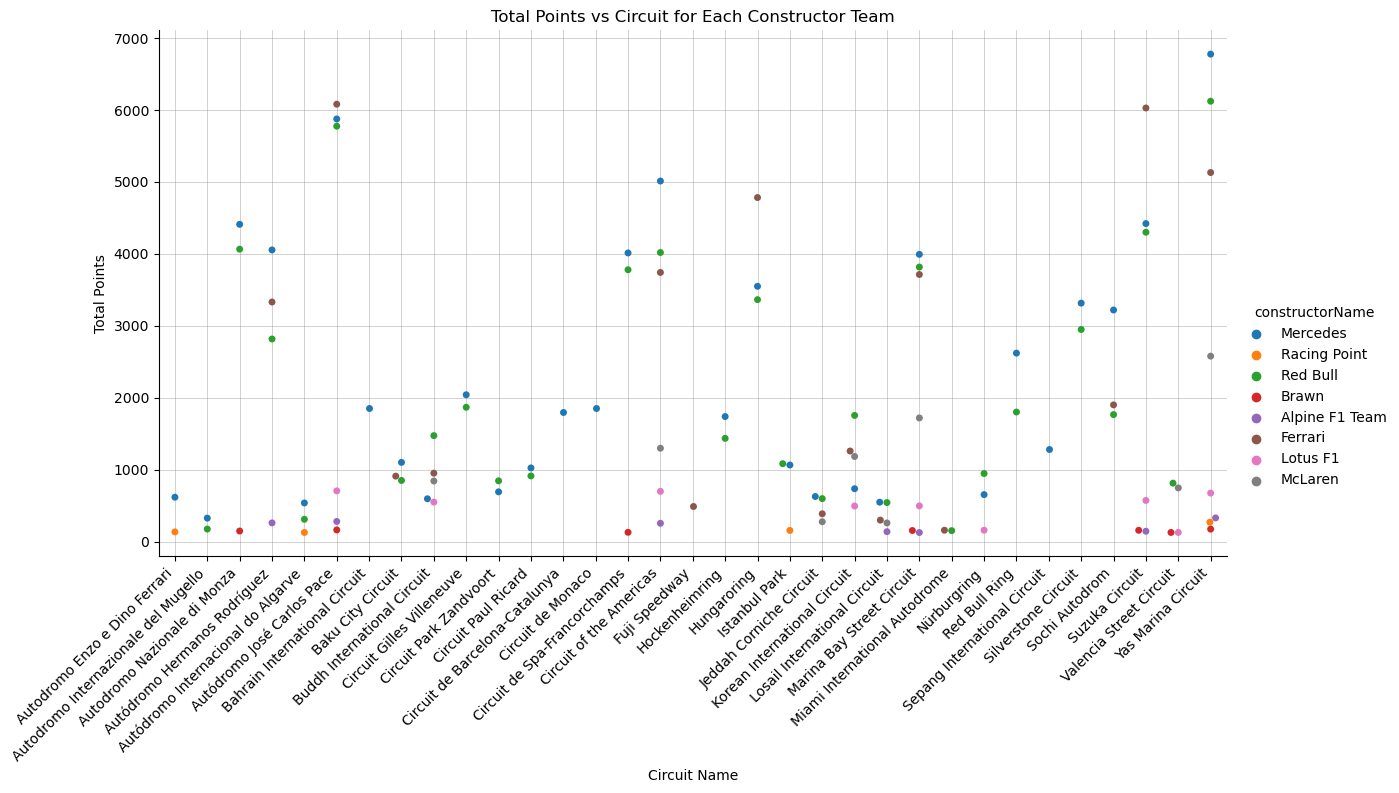

In [240]:
#now a graph by sum_points

alphOrderSumData = removeZeroPoints.sort_values("circuitName")

colorPalette = sns.color_palette("tab10")

meanPointPlot = sns.catplot(data=alphOrderSumData, x="circuitName", y="sum_points", 
                            hue="constructorName", kind="swarm", height=6, aspect=2, palette=colorPalette)

plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)
meanPointPlot.set_xticklabels(rotation=45, ha='right')


plt.title("Total Points vs Circuit for Each Constructor Team")
plt.xlabel("Circuit Name")
plt.ylabel("Total Points")
plt.show()


<font size = 3> We notice that there are similar trends amongst the mean and sum scatterplots. When observing the mean points vs circuit graph, we see the dominance of Mercedes and Redbull, which is parallel to the data we found in `aggOfConstructors`. When observing the sum points vs circuit graph, we see that Ferrari sometimes overtakes the two front runners, arguably because Ferrari participated in more races (this is also observable in `aggOfConstructors`).

## Re- Data Manipulation and Plotting

### De-bugging

<font size = 3> We notice from our final dataset, `removeZeroPoints`, that some of the circuits only had one race. As we know, the driver performance depends on both their skills (signal) and luck (noise). Therefore, if the sample size is small, the result may be due to extreme noise (luck) rather than skill. To prove skill, consistency is required: and multiple observations must be incorporated.

In [266]:
revToMean = removeZeroPoints.loc[removeZeroPoints["count_obs"] > 3]
display(revToMean)
display(revToMean.head(10))
display(removeZeroPoints.head(10))

,,mean_points,sum_points,min_points,max_points,count_obs
circuitName,constructorName,,,,,
Autódromo Hermanos Rodríguez,Mercedes,579.071429,4053.5,447.0,679.0,7
Yas Marina Circuit,Mercedes,521.192308,6775.5,136.0,765.0,13
Circuit of the Americas,Mercedes,501.150000,5011.5,136.0,695.0,10
Autódromo José Carlos Pace,Mercedes,489.541667,5874.5,142.0,722.0,12
Korean International Circuit,Red Bull,438.250000,1753.0,367.0,558.0,4
...,...,...,...,...,...,...
Hungaroring,Ferrari,129.243243,4782.0,14.0,335.0,37
Circuit Gilles Villeneuve,Red Bull,124.400000,1866.0,4.0,304.0,15
Marina Bay Street Circuit,Lotus F1,123.750000,495.0,8.0,231.0,4


,,mean_points,sum_points,min_points,max_points,count_obs
circuitName,constructorName,,,,,
Autódromo Hermanos Rodríguez,Mercedes,579.071429,4053.5,447.0,679.0,7
Yas Marina Circuit,Mercedes,521.192308,6775.5,136.0,765.0,13
Circuit of the Americas,Mercedes,501.150000,5011.5,136.0,695.0,10
Autódromo José Carlos Pace,Mercedes,489.541667,5874.5,142.0,722.0,12
Korean International Circuit,Red Bull,438.250000,1753.0,367.0,558.0,4
Yas Marina Circuit,Red Bull,437.214286,6121.0,153.5,759.0,14
Sochi Autodrom,Mercedes,402.312500,3218.5,136.0,571.0,8
Autódromo Hermanos Rodríguez,Red Bull,402.214286,2815.5,172.0,696.0,7
Suzuka Circuit,Mercedes,401.818182,4420.0,123.0,612.0,11


mean_points  sum_points  \
circuitName                  constructorName                            
Autódromo Hermanos Rodríguez Mercedes          579.071429      4053.5   
Losail International Circuit Mercedes          546.500000       546.5   
                             Red Bull          541.500000       541.5   
Yas Marina Circuit           Mercedes          521.192308      6775.5   
Circuit of the Americas      Mercedes          501.150000      5011.5   
Buddh International Circuit  Red Bull          490.666667      1472.0   
Autódromo José Carlos Pace   Mercedes          489.541667      5874.5   
Korean International Circuit Red Bull          438.250000      1753.0   
Yas Marina Circuit           Red Bull          437.214286      6121.0   
Circuit Park Zandvoort       Red Bull          421.750000       843.5   

                                              min_points  max_points  \
circuitName                  constructorName                           
Autódromo Hermanos Rodríguez Mercedes              447.0       679.0   
Losail International Circuit Mercedes              546.5       546.5   
                             Red Bull              541.5       541.5   
Yas Marina Circuit           Mercedes              136.0       765.0   
Circuit of the Americas      Mercedes              136.0       695.0   
Buddh International Circuit  Red Bull              407.0       595.0   
Autódromo José Carlos Pace   Mercedes              142.0       722.0   
Korean International Circuit Red Bull              367.0       558.0   
Yas Marina Circuit           Red Bull              153.5       759.0   
Circuit Park Zandvoort       Red Bull              332.5       511.0   

                                              count_obs  
circuitName                  constructorName             
Autódromo Hermanos Rodríguez Mercedes                 7  
Losail International Circuit Mercedes                 1  
                             Red Bull                 1  
Yas Marina Circuit           Mercedes                13  
Circuit of the Americas      Mercedes                10  
Buddh International Circuit  Red Bull                 3  
Autódromo José Carlos Pace   Mercedes                12  
Korean International Circuit Red Bull                 4  
Yas Marina Circuit           Red Bull                14  
Circuit Park Zandvoort       Red Bull                 2

<font size = 3> Our new dataset `revToMean` only has 63 rows. When we print the top ten mean points from `revToMean` (second table) and compare it to our previous dataset `removeZeroPoints` (third table), we see that while the composition that makes the top ten remains the same (Mecedes and Red Bull), there is more occurances of Mercedes compared to Redbull in our new dataset. This suggests that Mercedes has been consistently good for a longer period compared to Red Bull. There is also a possibility that Red Bull is a relatively newer team that is recently starting to dominate. 

Taking it another level, if we increase the necessary number of observations to at least 10, we get a data table with 35 rows. This dataset only contains four different constructors: Mercedes, Redbull, Ferrari, and McLaren Additionally, we notice the addition of Ferrari into the top ten, and lower mean_points value. 

In [273]:
revToMean10 = removeZeroPoints.loc[removeZeroPoints["count_obs"] >= 10]
display(revToMean10)
print(len(revToMean10))
display(revToMean10.head(10))

mean_points  sum_points  \
circuitName                    constructorName                            
Yas Marina Circuit             Mercedes          521.192308      6775.5   
Circuit of the Americas        Mercedes          501.150000      5011.5   
Autódromo José Carlos Pace     Mercedes          489.541667      5874.5   
Yas Marina Circuit             Red Bull          437.214286      6121.0   
Suzuka Circuit                 Mercedes          401.818182      4420.0   
Circuit of the Americas        Red Bull          401.750000      4017.5   
                               Ferrari           374.050000      3740.5   
Yas Marina Circuit             Ferrari           366.392857      5129.5   
Marina Bay Street Circuit      Mercedes          362.909091      3992.0   
Autódromo José Carlos Pace     Red Bull          339.647059      5774.0   
Autodromo Nazionale di Monza   Mercedes          339.192308      4409.5   
Circuit de Spa-Francorchamps   Mercedes          308.576923      4011.5   
Suzuka Circuit                 Red Bull          307.107143      4299.5   
Marina Bay Street Circuit      Red Bull          293.500000      3815.5   
                               Ferrari           285.538462      3712.0   
Hungaroring                    Mercedes          272.923077      3548.0   
Red Bull Ring                  Mercedes          238.090909      2619.0   
Silverstone Circuit            Mercedes          236.714286      3314.0   
Autodromo Nazionale di Monza   Red Bull          225.777778      4064.0   
Circuit de Spa-Francorchamps   Red Bull          222.235294      3778.0   
Suzuka Circuit                 Ferrari           188.343750      6027.0   
Hungaroring                    Red Bull          186.805556      3362.5   
Circuit Gilles Villeneuve      Mercedes          185.454545      2040.0   
Yas Marina Circuit             McLaren           184.071429      2577.0   
Red Bull Ring                  Red Bull          163.636364      1800.0   
Autódromo Hermanos Rodríguez   Ferrari           158.547619      3329.5   
Autódromo José Carlos Pace     Ferrari           155.884615      6079.5   
Silverstone Circuit            Red Bull          155.131579      2947.5   
Circuit de Monaco              Mercedes          154.500000      1854.0   
Circuit de Barcelona-Catalunya Mercedes          138.153846      1796.0   
Bahrain International Circuit  Mercedes          132.428571      1854.0   
Marina Bay Street Circuit      McLaren           132.153846      1718.0   
Circuit of the Americas        McLaren           129.700000      1297.0   
Hungaroring                    Ferrari           129.243243      4782.0   
Circuit Gilles Villeneuve      Red Bull          124.400000      1866.0   

                                                min_points  max_points  \
circuitName                    constructorName                           
Yas Marina Circuit             Mercedes              136.0       765.0   
Circuit of the Americas        Mercedes              136.0       695.0   
Autódromo José Carlos Pace     Mercedes              142.0       722.0   
Yas Marina Circuit             Red Bull              153.5       759.0   
Suzuka Circuit                 Mercedes              123.0       612.0   
Circuit of the Americas        Red Bull              150.0       656.0   
                               Ferrari               196.0       497.0   
Yas Marina Circuit             Ferrari                70.0       571.0   
Marina Bay Street Circuit      Mercedes              114.0       538.0   
Autódromo José Carlos Pace     Red Bull               16.0       719.0   
Autodromo Nazionale di Monza   Mercedes              108.0       505.0   
Circuit de Spa-Francorchamps   Mercedes               98.0       471.0   
Suzuka Circuit                 Red Bull               16.0       619.0   
Marina Bay Street Circuit      Red Bull               28.0       576.0   
                               Ferrari                62.0       439.0   
Hungaroring   

35


mean_points  sum_points  \
circuitName                constructorName                            
Yas Marina Circuit         Mercedes          521.192308      6775.5   
Circuit of the Americas    Mercedes          501.150000      5011.5   
Autódromo José Carlos Pace Mercedes          489.541667      5874.5   
Yas Marina Circuit         Red Bull          437.214286      6121.0   
Suzuka Circuit             Mercedes          401.818182      4420.0   
Circuit of the Americas    Red Bull          401.750000      4017.5   
                           Ferrari           374.050000      3740.5   
Yas Marina Circuit         Ferrari           366.392857      5129.5   
Marina Bay Street Circuit  Mercedes          362.909091      3992.0   
Autódromo José Carlos Pace Red Bull          339.647059      5774.0   

                                            min_points  max_points  count_obs  
circuitName                constructorName                                     
Yas Marina Circuit         Mercedes              136.0       765.0         13  
Circuit of the Americas    Mercedes              136.0       695.0         10  
Autódromo José Carlos Pace Mercedes              142.0       722.0         12  
Yas Marina Circuit         Red Bull              153.5       759.0         14  
Suzuka Circuit             Mercedes              123.0       612.0         11  
Circuit of the Americas    Red Bull              150.0       656.0         10  
                           Ferrari               196.0       497.0         10  
Yas Marina Circuit         Ferrari                70.0       571.0         14  
Marina Bay Street Circuit  Mercedes              114.0       538.0         11  
Autódromo José Carlos Pace Red Bull               16.0       719.0         17

/var/folders/09/p8y0p7q5041d1yjwsfxkcn800000gn/T/ipykernel_51151/3229228996.py:5: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  meanPointPlot = sns.catplot(data=alphOrderRevToMean, x="circuitName", y="mean_points",


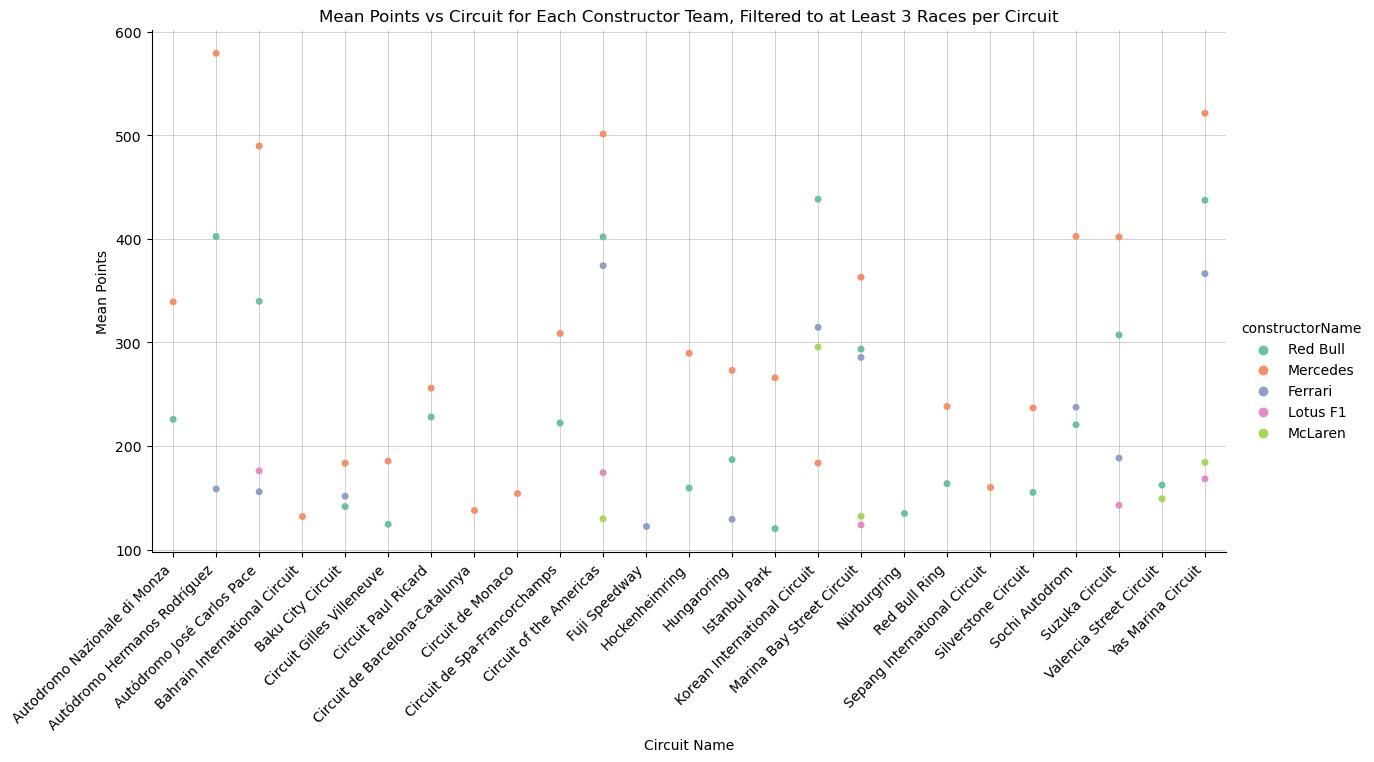

In [275]:
alphOrderRevToMean = revToMean.sort_values("circuitName")

colorPalette = sns.color_palette("Set2")

meanPointPlot = sns.catplot(data=alphOrderRevToMean, x="circuitName", y="mean_points", 
                            hue="constructorName", kind="swarm", height=6, aspect=2, palette=colorPalette)

plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

meanPointPlot.set_xticklabels(rotation=45, ha='right')


plt.title("Mean Points vs Circuit for Each Constructor Team, Filtered to at Least 3 Races per Circuit")
plt.xlabel("Circuit Name")
plt.ylabel("Mean Points")
plt.show()

<font size =3> The plot above shows the dominance of Mercedes. Additionally, we notice that Circuit of the Americas, Nürburgring, and Yas Marina Circuit are the most competitve with five different constructor teams having high average points, suggesting that these will be the most entertaining races to watch. 

/var/folders/09/p8y0p7q5041d1yjwsfxkcn800000gn/T/ipykernel_51151/3049010836.py:5: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  meanPointPlot = sns.catplot(data=alphOrderRevToMean10, x="circuitName", y="mean_points",


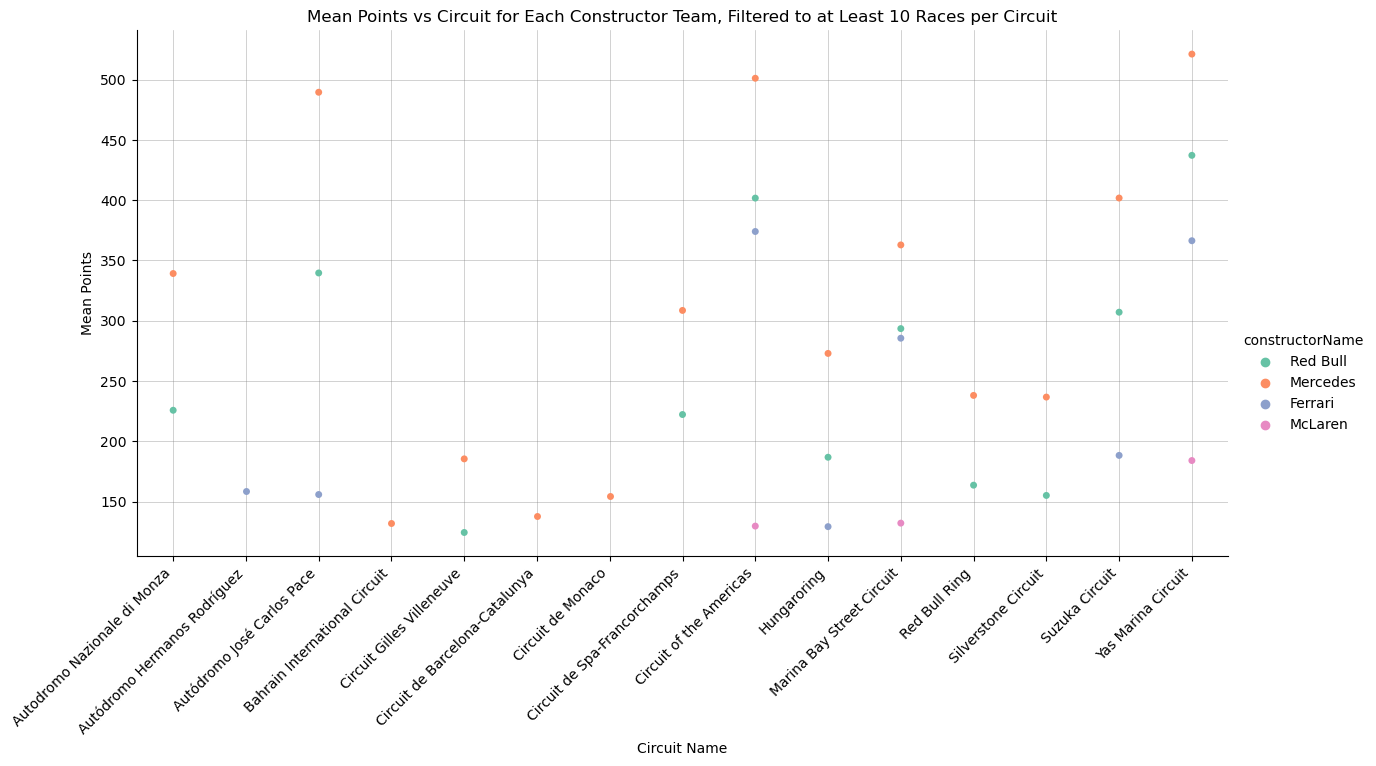

In [276]:
alphOrderRevToMean10 = revToMean10.sort_values("circuitName")

colorPalette = sns.color_palette("Set2")

meanPointPlot = sns.catplot(data=alphOrderRevToMean10, x="circuitName", y="mean_points", 
                            hue="constructorName", kind="swarm", height=6, aspect=2, palette=colorPalette)

plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)

meanPointPlot.set_xticklabels(rotation=45, ha='right')


plt.title("Mean Points vs Circuit for Each Constructor Team, Filtered to at Least 10 Races per Circuit")
plt.xlabel("Circuit Name")
plt.ylabel("Mean Points")
plt.show()

<font size =3 > Increasing the necessary races to ten puts even more of an emphasis on the domination of Mercedes. Excluding Autódromo Hermanos Rodríguez, where only Ferrari makes the cut, Mercedes tops every list, and sometimes is the only team to meet the competitive point bracket. Additionally, there is a further decrease in the number of different circuits, showing that these circuits are the most historic, but also enjoyable. One surprise is the low mean point at Circuit de Monaco, the most famous circuit in the world. We notice a similar trend in the original mean point vs circuit and sum point vs circuit graphs, which suggests that Circuit de Monaco is a very difficult racing venue. 

## Discussion

### Summary of Findings

<font size = 3> In this study, we found that Mercedes is at this moment, with the data from "Formula1-DatasetFull", is the greatest constructor team of all time. While Mercedes and Redbull are toe-to-toe when observing all the data, Mercedes topped the charts at every different graph and level, dominating by margins when you control for consistency by increasing the required number of observations. Additionally, We infer that the most competitive, entertaining circuits are Circuit of the Americas, Nürburgring, and Yas Marina Circuit with these having the most number of different teams performing at a high level. 

The increasing gap between Mercedes and Redbull when you increase the number of observations required (in `revToMean` and `revToMean10`) is probably due to the recent meteoric rise of RedBull from 2016, when they signed Max Verstappen. The 2023 Driver Standings shows Max Verstappen with 575 points, which is over double of the next best racer, Sergio Perez, standing at 285 points. Lewis Hamilton ranks at third place with 234 points. 

Lewis Hamilton, considered by many as the greatest F1 driver of all time, is heavily credited for the dominance of Mercedes. Hamilton has won a joint-record of 7 World Championship Titles and holds the record for the most wins, 103 and podium finishes, 197 (Data acquired from Wikipedia). These incredible accolades are reflected in the data. 

In future work, I would like to improve my work by implementing time. The data that I worked with shows the best team throughout history at each track, therefore, it would not be an accurate model to predict who might win the next Grand prix at a certain circuit. With time implemented, I would be able to create a better prediction model (of course it would need a lot more than time to create a good machine learning model). 